In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Mall_Customers.csv')
print(df.head())
print(df.info())
print(df.describe())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

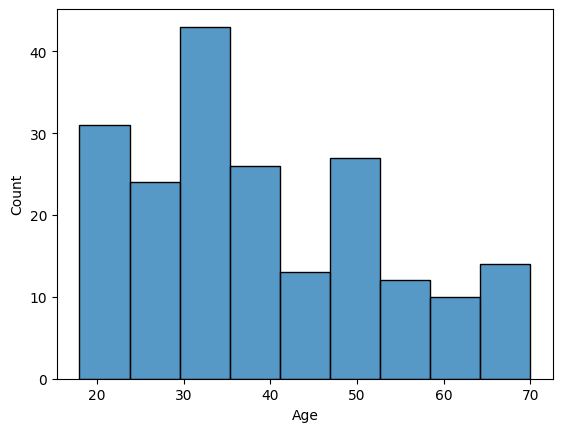

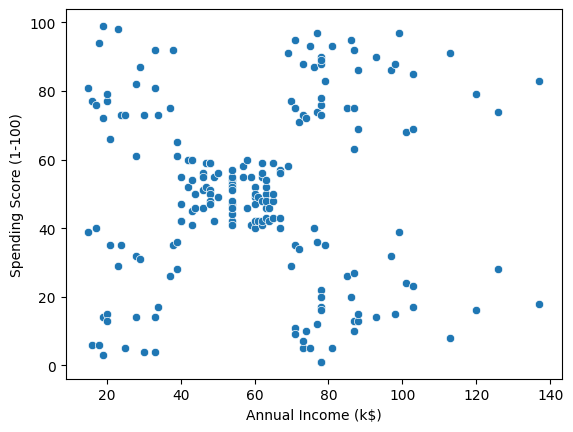

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['Age'])
plt.show()
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.show()



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaled_features = scaler.fit_transform(features)


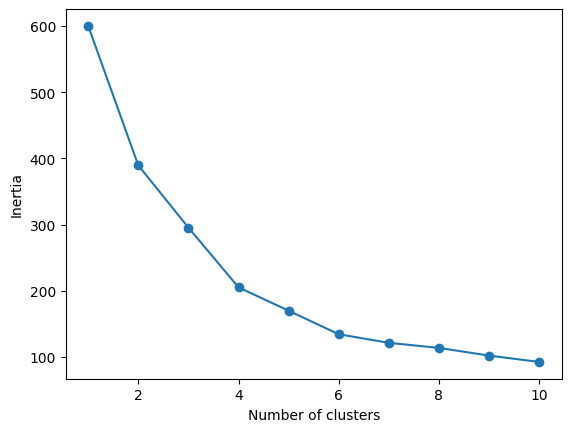

In [ ]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


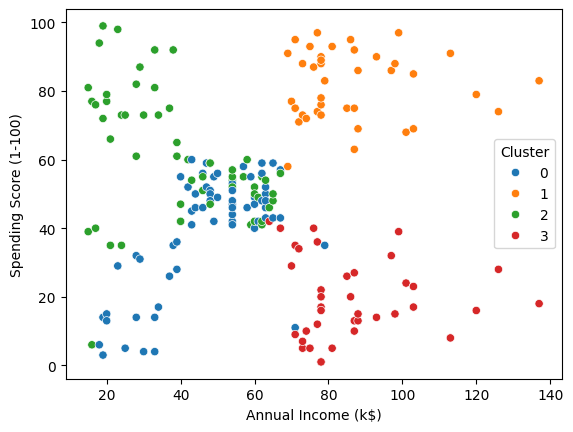

In [ ]:
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='tab10',
    data=df
)
plt.show()


In [ ]:
print(df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        53.984615           47.707692               39.969231
1        32.875000           86.100000               81.525000
2        25.438596           40.000000               60.298246
3        39.368421           86.500000               19.578947


In [ ]:
# Calculate average values for each cluster
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).round(2)

print("Cluster Summary:")
print(cluster_summary)

# Count customers in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print("\nCustomers per cluster:")
print(cluster_counts)


Cluster Summary:
           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        53.98               47.71                   39.97
1        32.88               86.10                   81.53
2        25.44               40.00                   60.30
3        39.37               86.50                   19.58

Customers per cluster:
Cluster
0    65
1    40
2    57
3    38
Name: count, dtype: int64


In [ ]:
# Example cluster interpretation (adjust based on your results)
cluster_profiles = {
    0: "Budget Shoppers: Young, low income, careful spenders",
    1: "High Rollers: High income, high spending, premium customers",
    2: "Conservative Earners: High income but conservative spending",
    3: "Young Spenders: Low income but high spending, impulsive buyers"
}

# Add persona names to your dataframe
df['Persona'] = df['Cluster'].map(cluster_profiles)


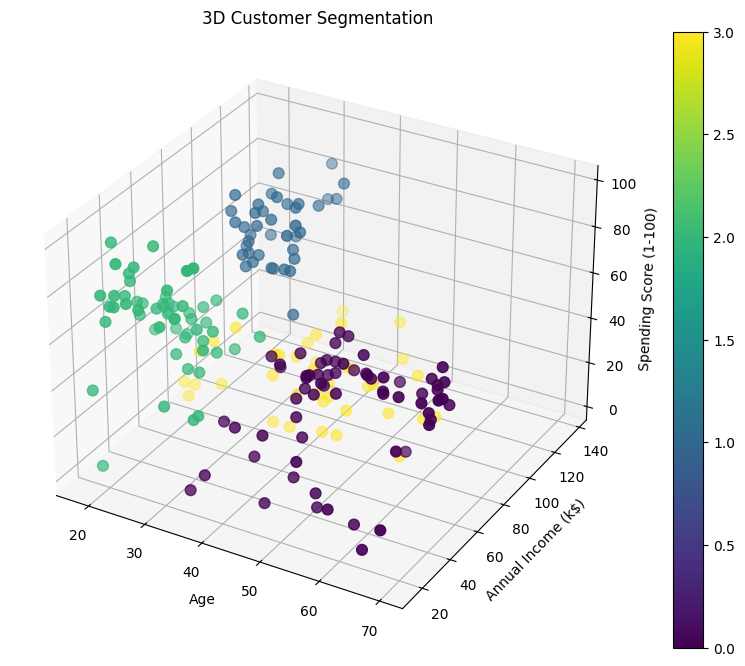

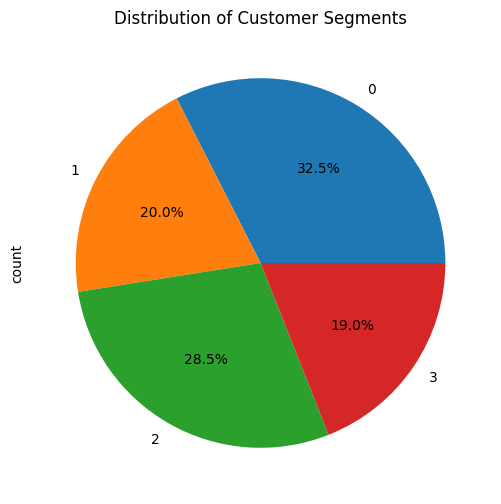

In [ ]:
# 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['Annual Income (k$)'],
                    df['Spending Score (1-100)'], c=df['Cluster'],
                    cmap='viridis', s=60)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.colorbar(scatter)
plt.title('3D Customer Segmentation')
plt.show()

# Cluster distribution pie chart
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Customer Segments')
plt.show()


In [1]:
# Create actionable business insights
recommendations = {
    0: "Target with budget-friendly promotions and value deals",
    1: "Focus on premium products and VIP experiences",
    2: "Educate on product value to increase spending",
    3: "Use social media marketing and trendy products"
}

for cluster_id, recommendation in recommendations.items():
    print(f"Cluster {cluster_id}: {recommendation}")


Cluster 0: Target with budget-friendly promotions and value deals
Cluster 1: Focus on premium products and VIP experiences
Cluster 2: Educate on product value to increase spending
Cluster 3: Use social media marketing and trendy products


In [3]:
# Save your results for the portfolio
df.to_csv('customer_segmentation_results.csv', index=False)
cluster_summary.to_csv('cluster_analysis.csv')


NameError: name 'df' is not defined